### Amazon Sentiment Analysis

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from nltk.corpus import stopwords
import re
import os

####  import & rename columns

In [3]:
data_path = ('amazon_cells_labelled.txt')
amzn_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
amzn_raw.columns = ['review','sentiment']

amzn_raw.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [12]:
amzn_raw['review'].head()

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: review, dtype: object

#### Remove Stopwords

In [7]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


In [58]:
#tokenize
amzn_raw['tokenized_sentences'] = amzn_raw.apply(
            lambda row: word_tokenize(row['review']), axis=1
); 

amzn_raw.head()

,review,sentiment,tokenized_sentences
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [101]:
#remove stopwords

stopwords = set(stopwords.words('english'))

amzn_raw['tokenized_sentences'] = amzn_raw['tokenized_sentences'].apply(
                        lambda x: [item for item in x if item not in stopwords]
)

amzn_raw.head()

,review,sentiment,tokenized_sentences,Great,Excellent,wasted,,junk,junkdisappointed
0,So there is no way for me to plug it in here i...,0,"[So, way, plug, US, unless, I, go, converter, .]",False,False,False,False,False,False
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",False,True,False,False,False,False
2,Great for the jawbone.,1,"[Great, jawbone, .]",False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,"[Tied, charger, conversations, lasting, 45, mi...",False,False,False,False,False,False
4,The mic is great.,1,"[The, mic, great, .]",False,False,False,False,False,False


In [56]:
#no punctuation

nonPunct = re.compile('.*[A-Za-z0-9].*') 

amzn_raw['tokenized_sentences'] = amzn_raw['tokenized_sentences'].apply(
                        lambda x: [item for item in x if nonPunct.match(item)]
)

amzn_raw.head()

,review,sentiment,tokenized_sentences
0,So there is no way for me to plug it in here i...,0,"[way, plug, us, unless, go, converter]"
1,"Good case, Excellent value.",1,"[good, case, excellent, value]"
2,Great for the jawbone.,1,"[great, jawbone]"
3,Tied to charger for conversations lasting more...,0,"[tied, charger, conversations, lasting, 45, mi..."
4,The mic is great.,1,"[mic, great]"


In [102]:
#all lower

amzn_raw['review'] = amzn_raw['review'].apply(
                        lambda x: [item.lower() for item in x]
)

amzn_raw.head()

,review,sentiment,tokenized_sentences,Great,Excellent,wasted,,junk,junkdisappointed
0,"[s, o, , t, h, e, r, e, , i, s, , n, o, , ...",0,"[So, way, plug, US, unless, I, go, converter, .]",False,False,False,False,False,False
1,"[g, o, o, d, , c, a, s, e, ,, , e, x, c, e, ...",1,"[Good, case, ,, Excellent, value, .]",False,True,False,False,False,False
2,"[g, r, e, a, t, , f, o, r, , t, h, e, , j, ...",1,"[Great, jawbone, .]",False,False,False,False,False,False
3,"[t, i, e, d, , t, o, , c, h, a, r, g, e, r, ...",0,"[Tied, charger, conversations, lasting, 45, mi...",False,False,False,False,False,False
4,"[t, h, e, , m, i, c, , i, s, , g, r, e, a, ...",1,"[The, mic, great, .]",False,False,False,False,False,False


In [ ]:
#all lower

amzn_raw['tokenized_sentences'] = amzn_raw['tokenized_sentences'].apply(
                        lambda x: [item.lower() for item in x]
)

amzn_raw.head()

In [5]:
amzn_raw['review'] = amzn_raw.review.str.lower()

In [10]:
#seperate into good& bad

bad_review = amzn_raw[amzn_raw['sentiment']==0]
good_review = amzn_raw[amzn_raw['sentiment']==1]

In [11]:
bad_review

,review,sentiment,Great,Excellent,wasted,junkdisappointed
0,so there is no way for me to plug it in here i...,0,False,False,False,False
3,tied to charger for conversations lasting more...,0,False,False,False,False
5,i have to jiggle the plug to get it to line up...,0,False,False,False,False
6,if you have several dozen or several hundred c...,0,False,False,False,False
8,"needless to say, i wasted my money.",0,False,False,True,False
9,what a waste of money and time!.,0,False,False,False,False
12,if the two were seperated by a mere 5+ ft i st...,0,False,False,False,False
14,"the design is very odd, as the ear ""clip"" is n...",0,False,False,False,False
16,i advise everyone do not be fooled!,0,False,False,False,False
19,it clicks into place in a way that makes you w...,0,False,False,False,False


#### Identify Keywords

In [16]:
keywords = ['Great',     #good
            'Excellent', 
            'wasted',    #bad
            'junk',
            'disappointed',
            'plug'
    ]

for key in keywords:
    amzn_raw[str(key)] = amzn_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

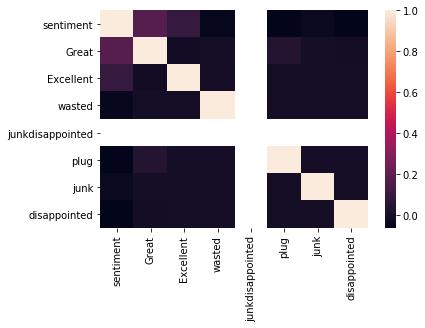

In [17]:
sns.heatmap(amzn_raw.corr())

In [18]:
data = amzn_raw[keywords]
target = amzn_raw['sentiment']

In [19]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 461
